#Importing libraries and cleaned_df_Eg dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
warnings.filterwarnings("ignore")
df=pd.read_csv('df_final.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,Voc,Jsc,FF,PCE,Cs,MA,FA,Pb,Sn,I,Br,BG,CBO,VBO,arch_nip,arch_pin,h_mobility,e_mobility,CBM,VBM,ETL_CBM,HTL_VBM,Reference
0,1.40,15.24,0.832,17.8,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.9,-0.3,0.68,1,0,0.000716,0.000992,-4.01,-5.91,-4.31,-5.23,10.1016/j.nantod.2022.101586
1,1.32,15.20,0.792,15.9,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.9,-0.3,1.08,1,0,0.000191,0.000992,-4.01,-5.91,-4.31,-4.83,10.1016/j.nantod.2022.101586


In [ ]:
print(df.isna().sum().sum())

0


#Data Prep

In [ ]:
dfx=df.iloc[:,4:-1]
X=dfx.values
y=df.iloc[:,0].values
y=y.reshape(len(y),1)
dfx

,Cs,MA,FA,Pb,Sn,I,Br,BG,CBO,VBO,arch_nip,arch_pin,h_mobility,e_mobility,CBM,VBM,ETL_CBM,HTL_VBM
0,1.0,0.00,0.00,1.0,0.0,2.00,1.00,1.90,-0.30,0.68,1,0,0.000716,0.000992,-4.01,-5.91,-4.31,-5.23
1,1.0,0.00,0.00,1.0,0.0,2.00,1.00,1.90,-0.30,1.08,1,0,0.000191,0.000992,-4.01,-5.91,-4.31,-4.83
2,0.0,0.15,0.85,1.0,0.0,3.00,0.00,1.53,-0.10,0.41,1,0,0.000465,0.000029,-4.10,-5.63,-4.20,-5.22
3,0.0,0.15,0.85,1.0,0.0,2.55,0.45,1.73,-0.18,0.49,1,0,0.000465,0.000029,-3.92,-5.65,-4.10,-5.16
4,1.0,0.00,0.00,1.0,0.0,3.00,0.00,1.69,-0.41,0.15,1,0,0.001200,0.000029,-3.60,-5.29,-4.01,-5.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0.0,1.00,0.00,1.0,0.0,3.00,0.00,1.50,-0.30,0.30,0,1,0.000330,0.000400,-3.90,-5.40,-4.20,-5.10
499,0.0,1.00,0.00,1.0,0.0,3.00,0.00,1.50,-0.30,0.26,0,1,0.001200,0.000400,-3.90,-5.40,-4.20,-5.14
500,0.0,1.00,0.00,1.0,0.0,3.00,0.00,1.50,-0.30,0.30,0,1,0.000465,0.000400,-3.90,-5.40,-4.20,-5.10
501,0.0,1.00,0.00,1.0,0.0,3.00,0.00,1.50,-0.30,0.10,0,1,0.002300,0.000400,-3.90,-5.40,-4.20,-5.30


#Ensemble Learning

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.15, random_state=140)
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train1,y_train1)

# Calculate cross-validated RMSE
mse_scores1 = cross_val_score(estimator=rf, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)
print("RMSE: {:.4f}".format(rmse_scores1.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores1.std()))

RMSE: 0.0552
Standard Deviation: 0.0042


In [ ]:
#RF on Test set
y_pred1=rf.predict(X_test1)
y_pred1=y_pred1.reshape(len(y_pred1),1)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test1, y_pred1))
print("R value:", r_value1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R2 on Test Set: 0.9543824545622736
R value: 0.9787226603185993
MAE on Test Set: 0.02472042418546364
MSE on Test Set: 0.001123107634823742
RMSE on Test Set: 0.03351279807511963


In [ ]:
#RF on Train set
y_train_pred1 = rf.predict(X_train1)
y_train_pred1=y_train_pred1.reshape(len(y_train_pred1),1)
r_value_p1 = np.corrcoef(y_train1.squeeze(), y_train_pred1.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train1, y_train_pred1))
print("R value:", r_value_p1)
print("MAE on Train Set:", mean_absolute_error(y_train1, y_train_pred1))
print("MSE on Train Set:", mean_squared_error(y_train1, y_train_pred1))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))

R2 on Train Set: 0.9802935826371628
R value: 0.9905485082265895
MAE on Train Set: 0.015420650288431396
MSE on Train Set: 0.00047461054478998654
RMSE on Train Set: 0.021785558170264688


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[1.13 1.14]
 [1.1  1.12]
 [1.1  1.11]
 [1.11 1.14]
 [1.03 0.99]
 [1.06 1.06]
 [1.08 1.04]
 [0.79 0.73]
 [1.12 1.1 ]
 [1.06 1.08]
 [1.02 1.08]
 [1.   1.03]
 [1.   1.05]
 [1.02 1.03]
 [0.54 0.46]
 [1.11 1.13]
 [1.1  1.12]
 [1.09 1.09]
 [1.04 1.04]
 [1.09 1.09]
 [1.03 1.06]
 [1.12 1.12]
 [0.97 0.9 ]
 [1.11 1.09]
 [1.08 1.09]
 [1.11 1.1 ]
 [0.99 1.04]
 [1.09 1.1 ]
 [1.08 1.14]
 [1.09 1.09]
 [0.77 0.75]
 [1.12 1.12]
 [1.11 1.14]
 [1.1  1.11]
 [1.09 1.09]
 [1.09 1.13]
 [0.74 0.74]
 [1.07 1.06]
 [1.1  1.1 ]
 [1.12 1.13]
 [1.1  1.12]
 [1.04 1.02]
 [1.07 1.09]
 [1.09 1.03]
 [1.09 1.1 ]
 [1.1  1.12]
 [0.74 0.62]
 [1.16 1.11]
 [1.36 1.31]
 [1.07 1.09]
 [1.14 1.14]
 [1.08 1.1 ]
 [1.11 1.1 ]
 [1.02 0.97]
 [1.19 1.2 ]
 [1.02 1.02]
 [0.51 0.45]
 [1.07 1.08]
 [1.03 1.04]
 [1.11 1.12]
 [1.08 1.07]
 [1.11 1.14]
 [1.12 1.15]
 [1.1  1.11]
 [1.08 1.1 ]
 [1.12 1.12]
 [1.13 1.16]
 [0.55 0.58]
 [1.1  1.08]
 [1.45 1.45]
 [1.01 1.04]
 [1.04 1.  ]
 [1.09 1.09]
 [1.06 1.1 ]
 [1.11 1.05]
 [1.07 1.1 ]]


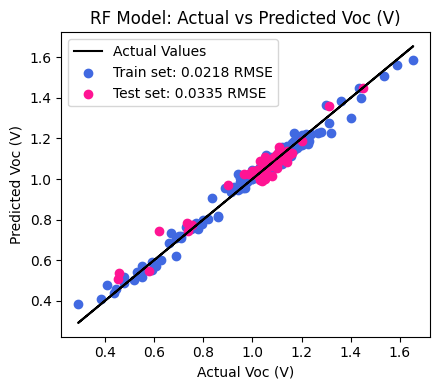

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black', label='Actual Values')
plt.scatter(y_train1, y_train_pred1, color='royalblue', label='Train set: 0.0218 RMSE')
plt.scatter(y_test1, y_pred1, color='deeppink', label='Test set: 0.0335 RMSE')

plt.xlabel('Actual Voc (V)')
plt.ylabel('Predicted Voc (V)')
plt.legend()
#plt.grid(True)
plt.title('RF Model: Actual vs Predicted Voc (V)')
plt.savefig('RF_Voc.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15,  random_state=140)
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=gbr, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE: {:.4f}".format(rmse_scores2.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores2.std()))

RMSE: 0.0574
Standard Deviation: 0.0073


In [ ]:
#GBR on test set
y_pred2=gbr.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R2 on Test Set: 0.9544931456158403
R value: 0.9827613309342997
MAE on Test Set: 0.02432941601307789
MSE on Test Set: 0.0011203824121890158
RMSE on Test Set: 0.03347211394861424


In [ ]:
#GBR on train set
y_train_pred2 = gbr.predict(X_train2)
y_train_pred2=y_train_pred2.reshape(len(y_train_pred2),1)
r_value_p2 = np.corrcoef(y_train2.squeeze(), y_train_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_train2, y_train_pred2))
print("R value:", r_value_p2)
print("MAE on Test Set:", mean_absolute_error(y_train2, y_train_pred2))
print("MSE on Test Set:", mean_squared_error(y_train2, y_train_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_train2, y_train_pred2)))

R2 on Test Set: 0.9550209277774528
R value: 0.9776217637490459
MAE on Test Set: 0.02487878695656623
MSE on Test Set: 0.0010832786893039692
RMSE on Test Set: 0.03291319931735548


In [ ]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[1.11 1.14]
 [1.1  1.12]
 [1.11 1.11]
 [1.11 1.14]
 [1.05 0.99]
 [1.06 1.06]
 [1.07 1.04]
 [0.78 0.73]
 [1.12 1.1 ]
 [1.06 1.08]
 [1.   1.08]
 [1.02 1.03]
 [1.01 1.05]
 [1.03 1.03]
 [0.58 0.46]
 [1.1  1.13]
 [1.1  1.12]
 [1.08 1.09]
 [1.04 1.04]
 [1.08 1.09]
 [1.08 1.06]
 [1.12 1.12]
 [0.95 0.9 ]
 [1.1  1.09]
 [1.07 1.09]
 [1.1  1.1 ]
 [1.03 1.04]
 [1.11 1.1 ]
 [1.09 1.14]
 [1.09 1.09]
 [0.76 0.75]
 [1.12 1.12]
 [1.12 1.14]
 [1.1  1.11]
 [1.1  1.09]
 [1.1  1.13]
 [0.73 0.74]
 [1.07 1.06]
 [1.1  1.1 ]
 [1.11 1.13]
 [1.1  1.12]
 [1.06 1.02]
 [1.11 1.09]
 [1.07 1.03]
 [1.09 1.1 ]
 [1.11 1.12]
 [0.72 0.62]
 [1.15 1.11]
 [1.31 1.31]
 [1.06 1.09]
 [1.15 1.14]
 [1.09 1.1 ]
 [1.12 1.1 ]
 [1.04 0.97]
 [1.2  1.2 ]
 [1.05 1.02]
 [0.52 0.45]
 [1.07 1.08]
 [1.   1.04]
 [1.11 1.12]
 [1.06 1.07]
 [1.11 1.14]
 [1.12 1.15]
 [1.11 1.11]
 [1.05 1.1 ]
 [1.11 1.12]
 [1.12 1.16]
 [0.62 0.58]
 [1.11 1.08]
 [1.41 1.45]
 [1.03 1.04]
 [1.04 1.  ]
 [1.09 1.09]
 [1.06 1.1 ]
 [1.1  1.05]
 [1.09 1.1 ]]


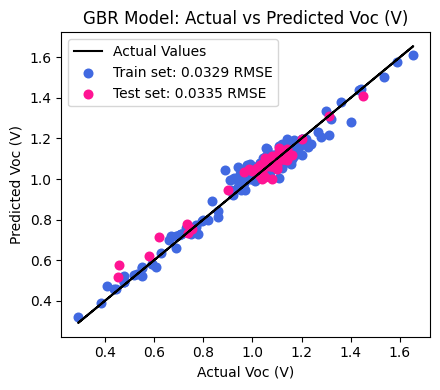

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))
plt.plot(y_train2, y_train2, color='black', label='Actual Values')
plt.scatter(y_train2, y_train_pred2, edgecolors='royalblue',
                linewidth=1.2,color='royalblue', label='Train set: 0.0329 RMSE')
plt.scatter(y_test2, y_pred2, edgecolors='deeppink',
                linewidth=1.2,color='deeppink', label='Test set: 0.0335 RMSE')
plt.xlabel('Actual Voc (V)')
plt.ylabel('Predicted Voc (V)')
plt.legend()
#plt.grid(True)
plt.title('GBR Model: Actual vs Predicted Voc (V)')
plt.savefig('GBR_Voc.png', dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

##XGBoost

In [ ]:
import xgboost as xgb
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.15, random_state=140)
xgb = xgb.XGBRegressor(random_state=42)
xgb.fit(X_train3,y_train3)

mse_scores3 = cross_val_score(estimator = xgb, X = X_train3, y = y_train3, cv = 5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE: {:.4f}".format(rmse_scores3.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores3.std()))

RMSE: 0.0620
Standard Deviation: 0.0050


In [ ]:
#XGB on Test set
y_pred3=xgb.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R2 on Test Set: 0.94751939316613
R value: 0.9754492774808983
MAE on Test Set: 0.026475025985115454
RMSE on Test Set: 0.03594546922715991


In [ ]:
#XGB on Train set
y_train_pred3 = xgb.predict(X_train3)

y_train_pred3=y_train_pred3.reshape(len(y_train_pred3),1)
r_value_p3 = np.corrcoef(y_train3.squeeze(), y_train_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train3, y_train_pred3))
print("R value:", r_value_p3)
print("MAE on Train Set:", mean_absolute_error(y_train3, y_train_pred3))
print("MSE on Train Set:", mean_squared_error(y_train3, y_train_pred3))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train3, y_train_pred3)))

R2 on Train Set: 0.9968391514058769
R value: 0.9984208759247445
MAE on Train Set: 0.003608354590369049
MSE on Train Set: 7.612606825655097e-05
RMSE on Train Set: 0.00872502540148457


In [ ]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[1.12 1.14]
 [1.09 1.12]
 [1.11 1.11]
 [1.09 1.14]
 [1.05 0.99]
 [1.06 1.06]
 [1.06 1.04]
 [0.75 0.73]
 [1.12 1.1 ]
 [1.11 1.08]
 [1.02 1.08]
 [0.97 1.03]
 [1.03 1.05]
 [1.02 1.03]
 [0.6  0.46]
 [1.11 1.13]
 [1.08 1.12]
 [1.1  1.09]
 [1.02 1.04]
 [1.09 1.09]
 [1.03 1.06]
 [1.12 1.12]
 [0.91 0.9 ]
 [1.12 1.09]
 [1.05 1.09]
 [1.11 1.1 ]
 [0.98 1.04]
 [1.12 1.1 ]
 [1.09 1.14]
 [1.09 1.09]
 [0.75 0.75]
 [1.11 1.12]
 [1.11 1.14]
 [1.1  1.11]
 [1.08 1.09]
 [1.1  1.13]
 [0.74 0.74]
 [1.07 1.06]
 [1.11 1.1 ]
 [1.12 1.13]
 [1.1  1.12]
 [1.06 1.02]
 [1.06 1.09]
 [1.1  1.03]
 [1.09 1.1 ]
 [1.11 1.12]
 [0.71 0.62]
 [1.13 1.11]
 [1.36 1.31]
 [1.07 1.09]
 [1.14 1.14]
 [1.1  1.1 ]
 [1.11 1.1 ]
 [1.03 0.97]
 [1.2  1.2 ]
 [1.03 1.02]
 [0.53 0.45]
 [1.09 1.08]
 [1.03 1.04]
 [1.11 1.12]
 [1.08 1.07]
 [1.1  1.14]
 [1.13 1.15]
 [1.11 1.11]
 [1.08 1.1 ]
 [1.1  1.12]
 [1.13 1.16]
 [0.55 0.58]
 [1.13 1.08]
 [1.42 1.45]
 [1.01 1.04]
 [1.02 1.  ]
 [1.1  1.09]
 [1.05 1.1 ]
 [1.11 1.05]
 [1.06 1.1 ]]


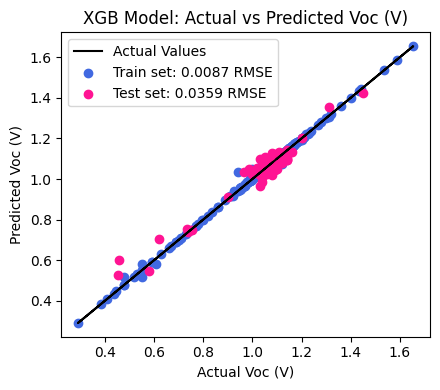

In [ ]:
y_train_pred3 = xgb.predict(X_train3)
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')
plt.scatter(y_train3, y_train_pred3, color='royalblue', label='Train set: 0.0087 RMSE')
plt.scatter(y_test3, y_pred3, color='deeppink', label='Test set: 0.0359 RMSE')

plt.xlabel('Actual Voc (V)')
plt.ylabel('Predicted Voc (V)')
plt.legend()
#plt.grid(True)
plt.title('XGB Model: Actual vs Predicted Voc (V)')
plt.savefig('XGB_Voc.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

##CatBoost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=140)
catboost = CatBoostRegressor(random_state=42)
catboost.fit(X_train4, y_train4, verbose=0)

# Evaluating with cross-validation
mse_scores4 = cross_val_score(estimator = catboost, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE: {:.4f}".format(rmse_scores4.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores4.std()))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.1397619	total: 6.86ms	remaining: 973ms
7:	learn: 0.1372260	total: 7.75ms	remaining: 961ms
8:	learn: 0.1348906	total: 8.66ms	remaining: 954ms
9:	learn: 0.1326105	total: 9.59ms	remaining: 949ms
10:	learn: 0.1303448	total: 10.5ms	remaining: 945ms
11:	learn: 0.1280162	total: 11.4ms	remaining: 941ms
12:	learn: 0.1257138	total: 12.3ms	remaining: 937ms
13:	learn: 0.1235307	total: 13.2ms	remaining: 931ms
14:	learn: 0.1215646	total: 14ms	remaining: 920ms
15:	learn: 0.1198852	total: 14.8ms	remaining: 913ms
16:	learn: 0.1178562	total: 15.7ms	remaining: 906ms
17:	learn: 0.1160094	total: 16.5ms	remaining: 900ms
18:	learn: 0.1140654	total: 17.3ms	remaining: 895ms
19:	learn: 0.1123712	total: 18.3ms	remaining: 898ms
20:	learn: 0.1105803	total: 19.2ms	remaining: 894ms
21:	learn: 0.1088765	total: 20.1ms	remaining: 892ms
22:	learn: 0.1070428	total: 21ms	remaining: 891ms
23:	learn: 0.1053186	total: 21.6ms	remaining: 877ms
24:	learn: 0.1037194	

In [ ]:
#CB on Test set
y_pred4 = catboost.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R2 on Test Set: 0.9447601127685562
R value: 0.979250380729247
MAE on Test Set: 0.025651414379129368
MSE on Test Set: 0.0013600104631041534
RMSE on Test Set: 0.03687831968927209


In [ ]:
#CB on Train set
y_train_pred4 = catboost.predict(X_train4)

y_train_pred4=y_train_pred4.reshape(len(y_train_pred4),1)
r_value_p4 = np.corrcoef(y_train4.squeeze(), y_train_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Train Set:", r2_score(y_train4, y_train_pred4))
print("R value:", r_value_p4)
print("MAE on Train Set:", mean_absolute_error(y_train4, y_train_pred4))
print("MSE on Train Set:", mean_squared_error(y_train4, y_train_pred4))
print("RMSE on Train Set:", np.sqrt(mean_squared_error(y_train4, y_train_pred4)))

R2 on Train Set: 0.9845905774555596
R value: 0.9923698019367669
MAE on Train Set: 0.01430362375619314
MSE on Train Set: 0.00037112146231653014
RMSE on Train Set: 0.019264513030869224


In [ ]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[1.12 1.14]
 [1.09 1.12]
 [1.11 1.11]
 [1.11 1.14]
 [1.03 0.99]
 [1.06 1.06]
 [1.07 1.04]
 [0.76 0.73]
 [1.11 1.1 ]
 [1.08 1.08]
 [1.01 1.08]
 [1.02 1.03]
 [1.02 1.05]
 [1.04 1.03]
 [0.56 0.46]
 [1.11 1.13]
 [1.1  1.12]
 [1.09 1.09]
 [1.01 1.04]
 [1.11 1.09]
 [1.08 1.06]
 [1.12 1.12]
 [0.95 0.9 ]
 [1.11 1.09]
 [1.06 1.09]
 [1.1  1.1 ]
 [1.01 1.04]
 [1.1  1.1 ]
 [1.09 1.14]
 [1.08 1.09]
 [0.75 0.75]
 [1.12 1.12]
 [1.12 1.14]
 [1.09 1.11]
 [1.1  1.09]
 [1.1  1.13]
 [0.77 0.74]
 [1.07 1.06]
 [1.11 1.1 ]
 [1.12 1.13]
 [1.1  1.12]
 [1.06 1.02]
 [1.08 1.09]
 [1.08 1.03]
 [1.09 1.1 ]
 [1.11 1.12]
 [0.73 0.62]
 [1.14 1.11]
 [1.31 1.31]
 [1.05 1.09]
 [1.14 1.14]
 [1.08 1.1 ]
 [1.12 1.1 ]
 [1.05 0.97]
 [1.2  1.2 ]
 [1.04 1.02]
 [0.61 0.45]
 [1.06 1.08]
 [1.01 1.04]
 [1.11 1.12]
 [1.07 1.07]
 [1.11 1.14]
 [1.12 1.15]
 [1.1  1.11]
 [1.08 1.1 ]
 [1.11 1.12]
 [1.13 1.16]
 [0.59 0.58]
 [1.11 1.08]
 [1.43 1.45]
 [1.02 1.04]
 [1.01 1.  ]
 [1.11 1.09]
 [1.04 1.1 ]
 [1.11 1.05]
 [1.08 1.1 ]]


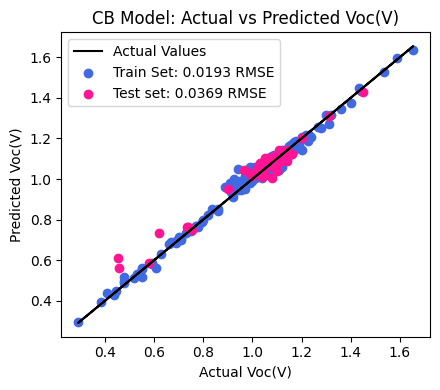

In [ ]:
# Plotting the results for the training set
plt.figure(figsize=(4.5, 4))

plt.plot(y_train4, y_train4, color='black', label='Actual Values')
plt.scatter(y_train4, y_train_pred4, color='royalblue', label='Train Set: 0.0193 RMSE')
plt.scatter(y_test4, y_pred4, color='deeppink', label='Test set: 0.0369 RMSE')

plt.xlabel('Actual Voc(V)')
plt.ylabel('Predicted Voc(V)')
plt.legend()
#plt.grid(True)
plt.title('CB Model: Actual vs Predicted Voc(V)')
plt.savefig('CB_Voc.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#SHAP Analysis

In [ ]:
pip install shap

In [ ]:
import shap
shap.initjs()

In [ ]:
dfx.shape

(503, 18)

In [ ]:
col=dfx.columns
dfx_test = pd.DataFrame(data=X, columns=col)

In [ ]:
explainer=shap.Explainer(rf)
shap_values=explainer(dfx_test[0:])

In [ ]:
np.shape(shap_values.values)

(503, 18)

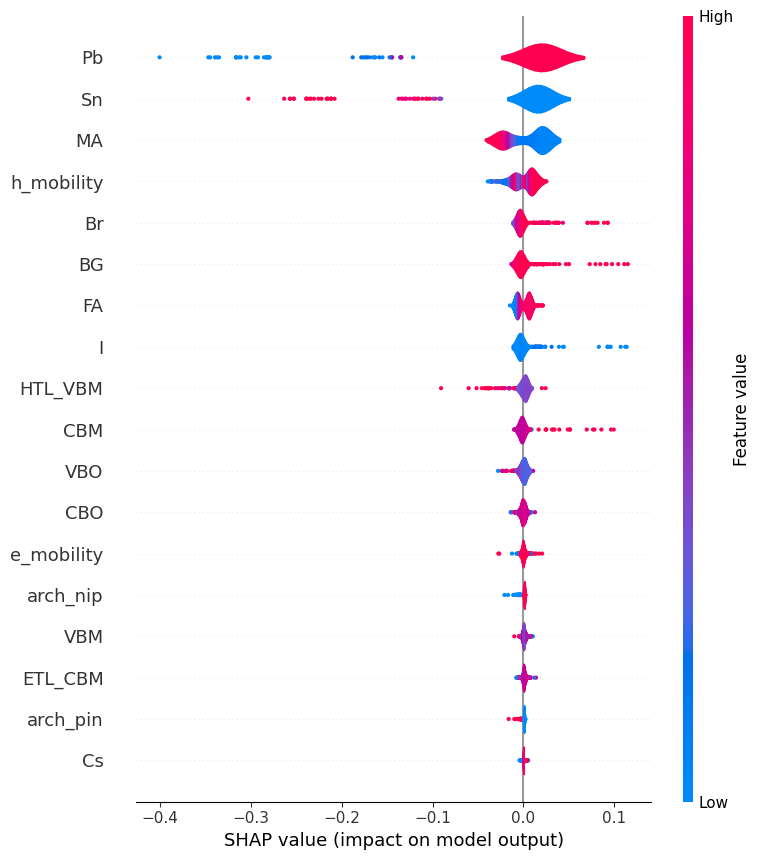

In [ ]:
#plt.figure(figsize=(10, 3))
shap.summary_plot(shap_values, plot_type='violin')
plt.show()

In [ ]:
shap.summary_plot(shap_values, plot_type='violin', show=False)

plt.savefig("shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

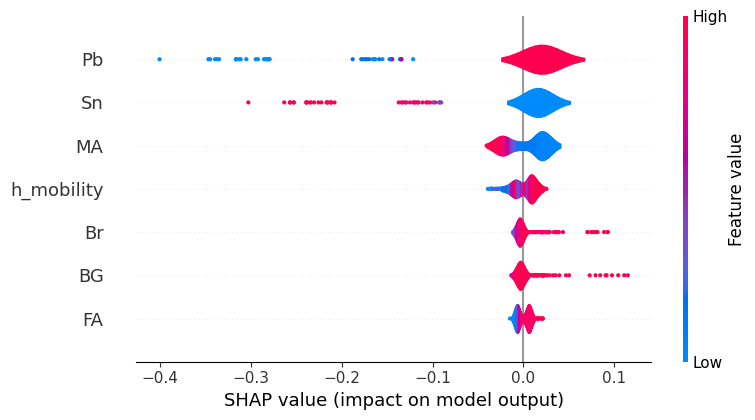

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 4))
shap.summary_plot(
    shap_values,
    plot_type="violin",   # beeswarm style
    max_display=7
)

plt.savefig("shap_summary.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
shap.summary_plot(shap_values, plot_type='violin',max_display=7, show=False)

plt.savefig("shap_summary.png", dpi=300, bbox_inches="tight")
plt.close()

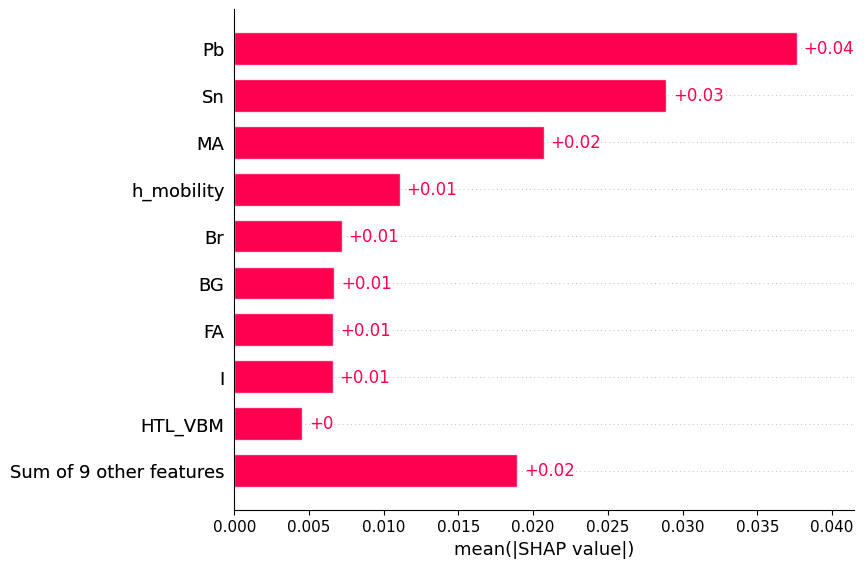

In [ ]:
plt.figure(figsize=(5, 3))
shap.plots.bar(shap_values)
plt.show()

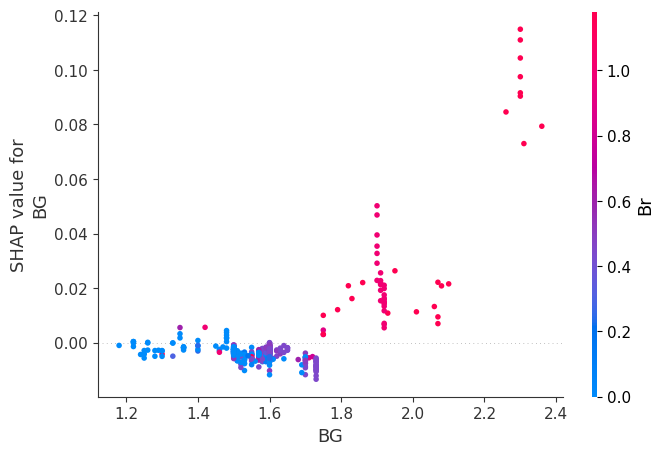

In [ ]:
# Scatter plot without background distribution
shap.plots.scatter(shap_values[:, 'BG'],color=shap_values[:,'Br'], show=False, hist=False)

# Set axis limits
#plt.xlim(1.1, 2.6)
# plt.ylim(-1, 1)

plt.show()

In [ ]:
shap.plots.scatter(shap_values[:, 'BG'],color=shap_values[:,'Br'], show=False, hist=False)
plt.savefig("FD_BG.png", dpi=300, bbox_inches="tight")
plt.close()

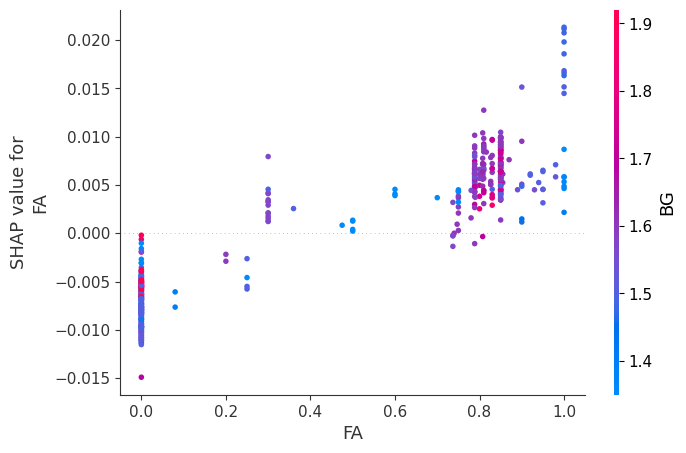

In [ ]:
shap.plots.scatter(shap_values[:,'FA'],color=shap_values[:,'BG'], hist=False)

<Axes: xlabel='Sn', ylabel='SHAP value for\nSn'>

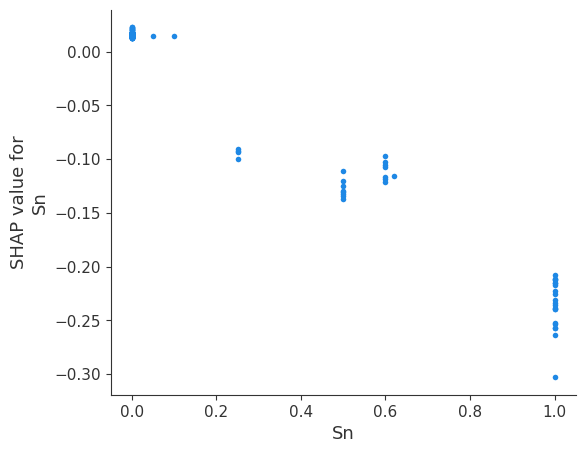

In [ ]:
shap.plots.scatter(shap_values[:,'Sn'], show=False, hist=False)

<Axes: xlabel='Br', ylabel='SHAP value for\nBr'>

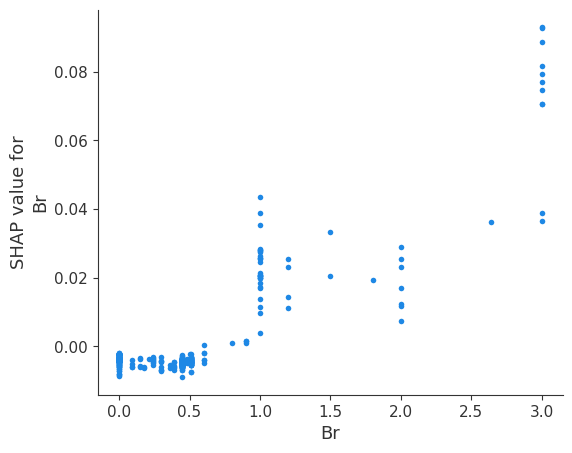

In [ ]:
shap.plots.scatter(shap_values[:,'Br'], show=False, hist=False)

In [ ]:
shap.plots.scatter(shap_values[:,'FA'],color=shap_values[:,'BG'],show=False, hist=False)
plt.savefig("FD_FA.png", dpi=300, bbox_inches="tight")
plt.close()

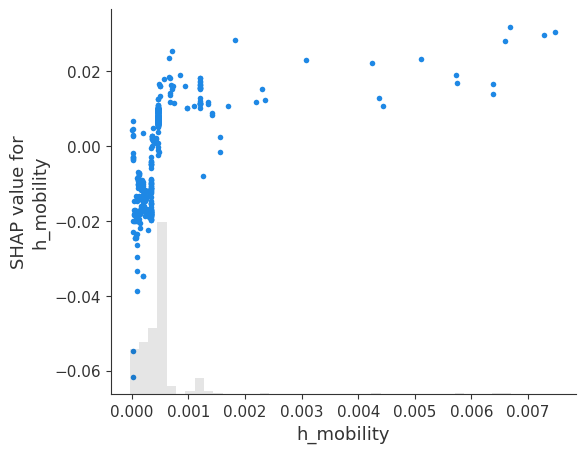

In [ ]:
shap.plots.scatter(shap_values[:,'h_mobility'])

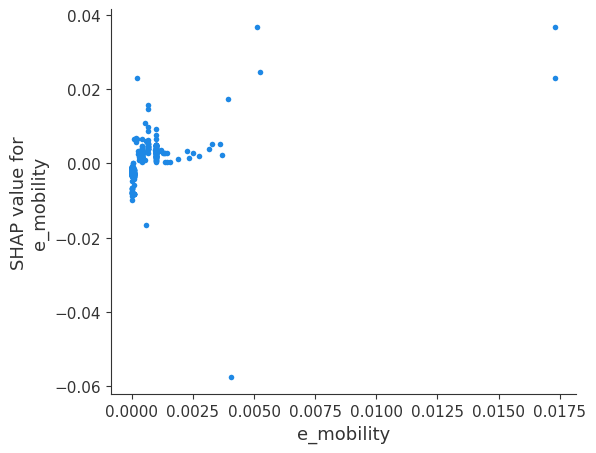

In [ ]:

# your scatter plot
shap.plots.scatter(shap_values[:, 'e_mobility'], show=False, hist=False)

# set axis limits according to your requirement
#plt.xlim(-0.0001, 0.007)   # example: x-axis from -2 to 2
#plt.ylim(-1, 1)   # example: y-axis from -1 to 1

plt.show()
